# In silico identification of switching nodes (ISIS), by F. Mairet 

## <I>Escherichia coli</I> (Core network) under aerobic vs anaerobic conditions - Sampling

In [1]:
import cobra
import numpy as np
from pandas import DataFrame
import pandas as pd
model=cobra.io.read_sbml_model("e_coli_core.xml")

### Computation of fluxes with pFBA

In [2]:
# Aerobic condition
pfba1 = cobra.flux_analysis.pfba(model)
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [3]:
# Anaerobic condition
model_Anaerobic=cobra.io.read_sbml_model("e_coli_core.xml")
med=model_Anaerobic.medium
med["EX_o2_e"] = 0.0
model_Anaerobic.medium=med
pfba2 = cobra.flux_analysis.pfba(model_Anaerobic)
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


### Identification of switch nodes with pFBA

In [4]:
# Concatenation and normalization of fluxes
V=(np.concatenate((np.array(pfba1.fluxes)[np.newaxis,:],np.array(pfba2.fluxes)[np.newaxis,:]),axis=0)).T
V=np.divide(V,np.linalg.norm(V,axis=0))

df1=DataFrame(V,index=model.reactions,columns=['Aerobic','Anaerobic'])
df1.to_excel('Ecoli_core_Flux.xlsx', sheet_name='sheet1', index=True)

S=cobra.util.array.create_stoichiometric_matrix(model,array_type='dense') # stoichiometric matrix

nm=S.shape[0] # number of metabolites

# loop on all the metabolites to compute their score
r=np.zeros(nm)
for i in range (0,nm):
    jj=S[i,:]!=0
    M=np.multiply(S[i,jj][np.newaxis,:].T, V[jj,:]) # compute M, removing the zero rows 
    
    u, s, vh = np.linalg.svd(M)
    
    if s[0]==0:
        r[i]=0
    else:
        r[i]=1-pow(s[0],2)/sum(pow(s,2))
        
# Export and print the results
df2=pd.concat([DataFrame(model.metabolites, columns=['Metabolite']), DataFrame(r, columns=['score'])], axis = 1) 
df2.to_excel('Ecoli_core_Metabolite.xlsx', sheet_name='sheet1', index=False)

ind=np.argsort(r)
for i in range (1,nm):
    print(model.metabolites[ind[-i]],':',r[ind[-i]])

nadh_c : 0.3160085009094282
nad_c : 0.3160085009094282
adp_c : 0.21546825897196542
atp_c : 0.21546825897196542
pi_c : 0.18896744287601663
h2o_c : 0.15478220415037458
coa_c : 0.14486085172227758
nadph_c : 0.1228900515126532
nadp_c : 0.1228900515126532
pyr_c : 0.12060007143820584
accoa_c : 0.10892263563732918
h_c : 0.05669900821136542
h_e : 0.0559239053705296
g6p_c : 0.048549119700138976
akg_c : 0.024845335219472853
pep_c : 0.0158573061814542
oaa_c : 0.012844202869620402
f6p_c : 0.011925845808905433
r5p_c : 0.010539646090503507
e4p_c : 0.007991564014716346
g3p_c : 0.003078298323075046
ru5p__D_c : 0.002953899696242157
co2_c : 0.001747009859030202
xu5p__D_c : 0.0009565913334192988
3pg_c : 0.0005877438989743133
13dpg_c : 0.0
o2_e : 0.0
2pg_c : 0.0
o2_c : 0.0
nh4_e : 0.0
glu__L_e : 0.0
nh4_c : 0.0
gln__L_c : 0.0
glx_c : 0.0
mal__L_e : 0.0
6pgc_c : 0.0
mal__L_c : 0.0
lac__D_e : 0.0
glu__L_c : 0.0
lac__D_c : 0.0
icit_c : 0.0
h2o_e : 0.0
gln__L_e : 0.0
q8_c : 0.0
6pgl_c : 0.0
pi_e : 0.0
fum_e :

### Flux sampling

In [6]:
from cobra.sampling import sample

ns=1000 # number of samples

# Aerobic condition
solution=model.optimize()
model.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").lower_bound=solution.objective_value*0.999

samples_Aerobic = sample(model, ns)
samples_Aerobic.to_excel('Flux_samples_Aerobic.xlsx')
samples_Aerobic.head()

,PFK,PFL,PGI,PGK,PGL,ACALD,AKGt2r,PGM,PIt2r,ALCD2x,...,MALS,MALt2_2,MDH,ME1,ME2,NADH16,NADTRHD,NH4t,O2t,PDH
0,7.484300,0.004394,4.847681,-16.021132,4.973323,-0.001192,-0.001338,-14.714900,3.212055,-0.000232,...,0.043750,0.0,5.101350,0.0,0.007842,38.568132,0.028999,4.761110,21.816787,9.322169
1,7.484684,0.020048,4.830016,-16.015413,4.991002,-0.000645,-0.000261,-14.709280,3.211814,-0.000244,...,0.006728,0.0,5.056472,0.0,0.012442,38.569448,0.121899,4.760753,21.815817,9.266199
2,7.355476,0.000079,4.492509,-15.902994,5.328516,-0.000120,-0.000009,-14.596908,3.211697,-0.000033,...,0.650928,0.0,5.605038,0.0,0.000313,38.718882,0.002161,4.760579,21.836652,9.819421
3,7.479996,0.012278,4.825661,-16.013933,4.995354,-0.002563,-0.000561,-14.707782,3.211856,-0.000022,...,0.104213,0.0,5.158287,0.0,0.003820,38.566985,0.013281,4.760814,21.812440,9.369116
4,7.466239,0.001459,4.775364,-15.997079,5.045644,-0.001718,-0.000081,-14.690877,3.211981,-0.000678,...,0.144689,0.0,5.159652,0.0,0.028331,38.599890,0.056739,4.761000,21.821592,9.402748


In [7]:
# Anaerobic condition
solution_Anaerobic=model_Anaerobic.optimize()
model_Anaerobic.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").lower_bound=solution_Anaerobic.objective_value*0.999
samples_Anaerobic = sample(model_Anaerobic, ns)
samples_Aerobic.to_excel('Flux_samples_Anaerobic.xlsx')
samples_Anaerobic.head()

,PFK,PFL,PGI,PGK,PGL,ACALD,AKGt2r,PGM,PIt2r,ALCD2x,...,MALS,MALt2_2,MDH,ME1,ME2,NADH16,NADTRHD,NH4t,O2t,PDH
0,9.789197,17.789406,9.955131,-19.437392,0.001522,-8.278580,-0.000256,-19.121061,0.777866,-8.277466,...,0.0,0.0,-0.001359,0.0,0.000318,0.001041,0.0,1.153002,0.0,0.002897
1,9.787947,17.787974,9.949737,-19.435594,0.006916,-8.286256,-0.000098,-19.119263,0.777866,-8.283910,...,0.0,0.0,-0.002514,0.0,0.000227,0.002287,0.0,1.153002,0.0,0.005966
2,9.792260,17.790103,9.956110,-19.437718,0.000543,-8.288394,-0.000312,-19.121387,0.777866,-8.286438,...,0.0,0.0,-0.011912,0.0,0.011850,0.000063,0.0,1.153002,0.0,0.011701
3,9.785079,17.784720,9.936558,-19.431201,0.020095,-8.300382,-0.000087,-19.114870,0.777866,-8.295906,...,0.0,0.0,-0.002694,0.0,0.002482,0.000212,0.0,1.153002,0.0,0.007162
4,9.789925,17.793004,9.945538,-19.434194,0.011114,-8.289282,-0.000550,-19.117863,0.777866,-8.286886,...,0.0,0.0,-0.003245,0.0,0.001080,0.002165,0.0,1.153002,0.0,0.001308


### Identification of switch nodes with Flux sampling

In [8]:
import random

# random index to create ns combinations between one flux vector in aerobic condition and one in anaerobic condition
ind2=list(range(0,ns))
random.seed(1)   
random.shuffle(ind2)

r2=np.zeros((nm,ns))

# loop on all the combinations

for k in range (0,ns):
    # Concatenation and normalization of fluxes
    V=(np.concatenate((np.array(samples_Aerobic.iloc[k])[np.newaxis,:],np.array(samples_Anaerobic.iloc[ind2[k]])[np.newaxis,:]),axis=0)).T
    V=np.divide(V,np.linalg.norm(V,axis=0))

    # loop on all the metabolites to compute their score
    for i in range (0,nm):
        jj=S[i,:]!=0
        M=np.multiply(S[i,jj][np.newaxis,:].T, V[jj,:]) # compute M, removing the zero rows 
        u, s, vh = np.linalg.svd(M)  
        if s[0]==0:
            r2[i,k]=0
        else:
            r2[i,k]=1-pow(s[0],2)/sum(pow(s,2))
        
# Computation of the mean and standard deviation of the switching score for each metabolite
r_sample=np.mean(r2,axis=1)
sdr_sample=np.std(r2,axis=1)

# Export and print the results
df3=pd.concat([DataFrame(model.metabolites, columns=['Metabolite']), DataFrame(r, columns=['score with pFBA']), DataFrame(r_sample, columns=['score with Flux sampling']), DataFrame(sdr_sample, columns=['Standard deviation'])], axis = 1) 
df3.to_excel('Ecoli_core_Metabolite_Sampling.xlsx', sheet_name='sheet1', index=False)

print('metabolite : score with pFBA : score with flux sampling')
for i in range (1,nm):
    print(model.metabolites[ind[-i]],':',r[ind[-i]],':',r_sample[ind[-i]])


metabolite : score with pFBA : score with flux sampling
nadh_c : 0.3160085009094282 : 0.14902581193762926
nad_c : 0.3160085009094282 : 0.14902581193762926
adp_c : 0.21546825897196542 : 0.11729510511633114
atp_c : 0.21546825897196542 : 0.11729510656264144
pi_c : 0.18896744287601663 : 0.11073296630174051
h2o_c : 0.15478220415037458 : 0.11624982592101482
coa_c : 0.14486085172227758 : 0.19121092562491288
nadph_c : 0.1228900515126532 : 0.08296897318071433
nadp_c : 0.1228900515126532 : 0.08296897318071433
pyr_c : 0.12060007143820584 : 0.1454633010197399
accoa_c : 0.10892263563732918 : 0.17927046503553248
h_c : 0.05669900821136542 : 0.08234211707675636
h_e : 0.0559239053705296 : 0.07110084950966279
g6p_c : 0.048549119700138976 : 0.0376336102744964
akg_c : 0.024845335219472853 : 0.0345513486555203
pep_c : 0.0158573061814542 : 0.013366984831684239
oaa_c : 0.012844202869620402 : 0.031243437288628974
f6p_c : 0.011925845808905433 : 0.012415266208570348
r5p_c : 0.010539646090503507 : 0.024868320755

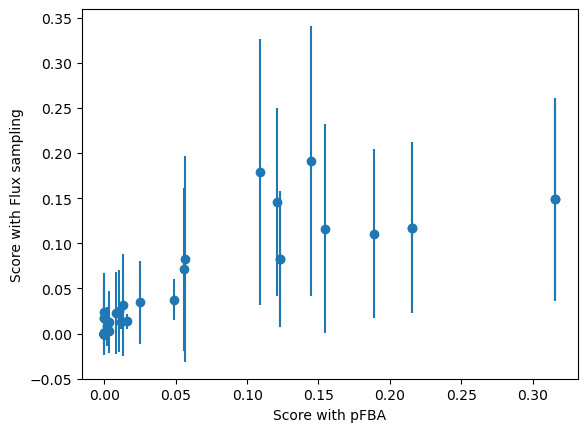

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.errorbar(r,r_sample,yerr=sdr_sample,fmt='o')
plt.xlabel('Score with pFBA')
plt.ylabel('Score with Flux sampling')
plt.show()

In [10]:
from scipy import stats

res = stats.spearmanr(r,r_sample)
res

SignificanceResult(statistic=0.825073180290545, pvalue=5.050634771965271e-19)